In [138]:
import pandas as pd
df = pd.read_csv('ratings.csv')
df1 = pd.read_csv('movies.csv')
df2 = pd.read_csv('tags.csv')
print(df.shape)
print(df1.shape)
print(df2.shape)
unique = []
for user in df["userId"]:
    if user not in unique:
        unique.append(user)
    
print(len(unique))

(100836, 4)
(9742, 3)
(3683, 4)
610


In [91]:
quan = df["movieId"].value_counts()
max_movie_id = quan.idxmax()
print(max_movie_id)

356


In [36]:
for index, row in df1.iterrows():
    if row["movieId"] == max_movie_id:
        name = row["title"]

print(name)

Forrest Gump (1994)


In [44]:
movie_title = "Matrix, The (1999)"
for index, row in df1.iterrows():
    if row["title"] == movie_title:
        movie_id = row["movieId"]

tag = []
for index, row in df2.iterrows():
    if row["movieId"] == movie_id:
        tag.append(row["tag"])
        
print(tag)

['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [50]:
rat = []
movie_title = "Terminator 2: Judgment Day (1991)"
for index, row in df1.iterrows():
    if row["title"] == movie_title:
        movie_id = row["movieId"]
for index,row in df.iterrows():
    if row["movieId"] == movie_id:
        rat.append(row["rating"])

print(sum(rat)/len(rat))

3.970982142857143


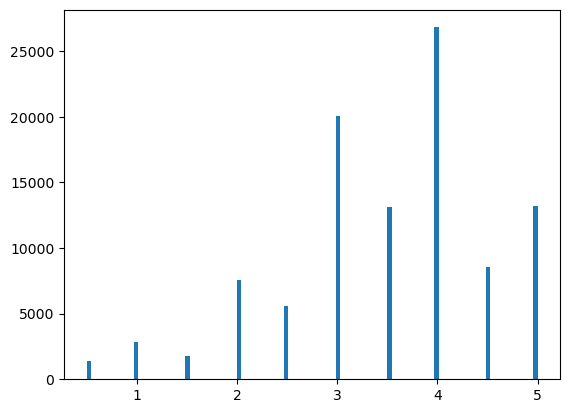

In [68]:
import matplotlib.pyplot as plt
rat = []
movie_title = "Fight Club (1999)"
for index, row in df1.iterrows():
    if row["title"] == movie_title:
        movie_id = row["movieId"]
for index,row in df.iterrows():
    if row["movieId"] == movie_id:
        df3 = df["rating"]

plt.hist(df3, bins='auto')
plt.show()


In [69]:
mean_val = df3.mean()
median_val = df3.median()
mode_val = df3.mode()

print("Mean:", mean_val)
print("Median:", median_val)
print("Mode:", mode_val)

Mean: 3.501556983616962
Median: 3.5
Mode: 0    4.0
Name: rating, dtype: float64


In [70]:
from scipy.stats import skew
skewness = skew(df3)
print("Skewness:", skewness)

Skewness: -0.6371899104652523


In [139]:
grouped_ratings = df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
joined_df = pd.merge(grouped_ratings,df1, on='movieId', how='inner')
filtered_df = joined_df[joined_df['count'] > 50]
print(filtered_df)

      movieId  count      mean                             title  \
0           1    215  3.920930                  Toy Story (1995)   
1           2    110  3.431818                    Jumanji (1995)   
2           3     52  3.259615           Grumpier Old Men (1995)   
5           6    102  3.946078                       Heat (1995)   
6           7     54  3.185185                    Sabrina (1995)   
...       ...    ...       ...                               ...   
8287   106782     54  3.916667   Wolf of Wall Street, The (2013)   
8354   109374     52  3.778846  Grand Budapest Hotel, The (2014)   
8358   109487     73  3.993151               Interstellar (2014)   
8457   112852     59  4.050847    Guardians of the Galaxy (2014)   
8673   122904     54  3.833333                   Deadpool (2016)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                          

In [76]:
rat = max(filtered_df["mean"])
print(rat) 
for index,row in filtered_df.iterrows():
    if row["mean"] == rat:
        movie_pop = row["title"]

print(movie_pop)

4.429022082018927
Shawshank Redemption, The (1994)


In [79]:
filtered_df.sort_values(["count"],
                    axis=0, 
                    ascending=[False],  
                    inplace=True) 
print(filtered_df)

      movieId  count      mean                             title  \
314       356    329  4.164134               Forrest Gump (1994)   
277       318    317  4.429022  Shawshank Redemption, The (1994)   
257       296    307  4.197068               Pulp Fiction (1994)   
510       593    279  4.161290  Silence of the Lambs, The (1991)   
1938     2571    278  4.192446                Matrix, The (1999)   
...       ...    ...       ...                               ...   
3147     4239     51  3.813725                       Blow (2001)   
3490     4776     51  3.794118               Training Day (2001)   
3539     4848     51  3.843137           Mulholland Drive (2001)   
118       145     51  3.245098                   Bad Boys (1995)   
1235     1645     51  3.411765       The Devil's Advocate (1997)   

                                      genres  
314                 Comedy|Drama|Romance|War  
277                              Crime|Drama  
257              Comedy|Crime|Drama|Thrill

C:\Users\SIVA KASHYAP\AppData\Local\Temp\ipykernel_29776\3454408669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(["count"],


In [81]:
filtered_df.to_csv("newcsv.csv")

In [82]:
df4 = pd.read_csv("newcsv.csv")

In [85]:
df5 = pd.DataFrame()
for index,row in df4.iterrows():
    if "Sci-Fi" in row["genres"]:
        df5 = df5.append(row,ignore_index=True)

df5.sort_values(["count"],
                    axis=0, 
                    ascending=[False],  
                    inplace=True) 
print(df5)

    Unnamed: 0  movieId  count      mean  \
0         1938     2571    278  4.192446   
1          224      260    251  4.231076   
2          418      480    238  3.750000   
3          507      589    224  3.970982   
4          897     1196    211  4.215640   
..         ...      ...    ...       ...   
83        8673   122904     54  3.833333   
84        2028     2701     53  2.207547   
85         144      172     53  2.679245   
86         559      673     53  2.707547   
87        6192    45499     52  3.355769   

                                                title  \
0                                  Matrix, The (1999)   
1           Star Wars: Episode IV - A New Hope (1977)   
2                                Jurassic Park (1993)   
3                   Terminator 2: Judgment Day (1991)   
4   Star Wars: Episode V - The Empire Strikes Back...   
..                                                ...   
83                                    Deadpool (2016)   
84             

C:\Users\SIVA KASHYAP\AppData\Local\Temp\ipykernel_29776\4041100414.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(row,ignore_index=True)


In [ ]:
df6 = pd.read_csv("links.csv")
merged_df = pd.merge(filtered_df,df6, on='movieId', how='inner')
imdb_ids = merged_df['imdbId']
merged_df['rating'] = None
from imdb import IMDb
ia = IMDb()

for index,row in merged_df.iterrows():
    imdb_id = row['imdbId']
    movie = ia.get_movie(imdb_id)
    rating = movie.data.get('rating', None)
    
    merged_df.at[index, 'rating'] = rating

In [ ]:
merged_df.to_csv("new.csv")

In [144]:
final_df = pd.read_csv('new.csv')

In [145]:
final_df.sort_values(["rating"],
                    axis=0, 
                    ascending=[False],  
                    inplace=True) 
print(final_df)

     Unnamed: 0  movieId  count      mean                             title  \
1             1      318    317  4.429022  Shawshank Redemption, The (1994)   
21           21      858    192  4.289062             Godfather, The (1972)   
72           72     1221    129  4.259690    Godfather: Part II, The (1974)   
44           44    58559    149  4.238255           Dark Knight, The (2008)   
370         370     1203     57  4.149123               12 Angry Men (1957)   
..          ...      ...    ...       ...                               ...   
338         338      420     59  2.720339      Beverly Hills Cop III (1994)   
304         304      435     63  2.420635                  Coneheads (1993)   
59           59      153    137  2.916058             Batman Forever (1995)   
365         365      160     57  2.877193                      Congo (1995)   
404         404     2701     53  2.207547             Wild Wild West (1999)   

                              genres  imdbId  tmdbI

In [146]:
df9 = pd.DataFrame()
for index,row in final_df.iterrows():
    if "Sci-Fi" in row["genres"]:
        df9 = df9.append(row,ignore_index=True)

df9.sort_values(["rating"],
                    axis=0, 
                    ascending=[False],  
                    inplace=True) 
print(df9)

    Unnamed: 0  movieId  count      mean  \
0           51    79132    143  4.066434   
2           12     1196    211  4.215640   
3          241   109487     73  3.993151   
1            4     2571    278  4.192446   
4            5      260    251  4.231076   
..         ...      ...    ...       ...   
83         414      172     53  2.679245   
84         315      173     62  2.669355   
85         304      435     63  2.420635   
86         365      160     57  2.877193   
87         404     2701     53  2.207547   

                                                title  \
0                                    Inception (2010)   
2   Star Wars: Episode V - The Empire Strikes Back...   
3                                 Interstellar (2014)   
1                                  Matrix, The (1999)   
4           Star Wars: Episode IV - A New Hope (1977)   
..                                                ...   
83                             Johnny Mnemonic (1995)   
84             

C:\Users\SIVA KASHYAP\AppData\Local\Temp\ipykernel_29776\61498164.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df9 = df9.append(row,ignore_index=True)
